# 1

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder, MinMaxScaler
from sklearn.decomposition import PCA
from sklearn import metrics
from scipy.spatial.distance import cdist
from sklearn.cluster import KMeans, AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.decomposition import TruncatedSVD

/var/folders/nh/jxnh82hs01v0q9hm7f66gq640000gn/T/ipykernel_33149/1941767497.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
df = pd.read_csv("Edata.csv")
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [3]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [5]:
df[df['CustomerID'].isnull() | df['Description'].isnull()].head()
df = df.dropna(subset=['CustomerID','Description'])
df.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [6]:
df.duplicated().sum()

5225

In [7]:
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

In [8]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [9]:
df['TotalAmount'] = df['Quantity'] * df['UnitPrice']

label_encoder = LabelEncoder()
df['Description_Encoded'] = label_encoder.fit_transform(df['Description'])
df['Country_encoded'] = label_encoder.fit_transform(df['Country'])

scaler = MinMaxScaler()
df[['Quantity', 'UnitPrice', 'TotalAmount']] = scaler.fit_transform(df[['Quantity', 'UnitPrice', 'TotalAmount']])

df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalAmount,Description_Encoded,Country_encoded
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,0.500037,12/1/2010 8:26,0.000065,17850.0,United Kingdom,0.500045,3713,35
1,536365,71053,WHITE METAL LANTERN,0.500037,12/1/2010 8:26,0.000087,17850.0,United Kingdom,0.500060,3721,35
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,0.500049,12/1/2010 8:26,0.000071,17850.0,United Kingdom,0.500065,860,35
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,0.500037,12/1/2010 8:26,0.000087,17850.0,United Kingdom,0.500060,1812,35
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,0.500037,12/1/2010 8:26,0.000087,17850.0,United Kingdom,0.500060,2774,35


In [10]:
df.drop(columns=['InvoiceNo', 'StockCode', 'Description', 
                 'InvoiceDate', 'Country'], inplace=True)
df.head()


,Quantity,UnitPrice,CustomerID,TotalAmount,Description_Encoded,Country_encoded
0,0.500037,0.000065,17850.0,0.500045,3713,35
1,0.500037,0.000087,17850.0,0.500060,3721,35
2,0.500049,0.000071,17850.0,0.500065,860,35
3,0.500037,0.000087,17850.0,0.500060,1812,35
4,0.500037,0.000087,17850.0,0.500060,2774,35


# 2
I looked at Quantity, UnitPrice, CustomerID, TotalAmount, Description_Encoded, Country_encoded, I used the elbow method to find the ideal k which was 5.

In [11]:
X = df[['Quantity', 'UnitPrice', 'TotalAmount', 'Description_Encoded', 
        'CustomerID','Country_encoded']]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

k = 5

kmeans = KMeans(n_clusters=k, random_state=32)
kmeans.fit(X_scaled)



KMeans(n_clusters=5, random_state=32)

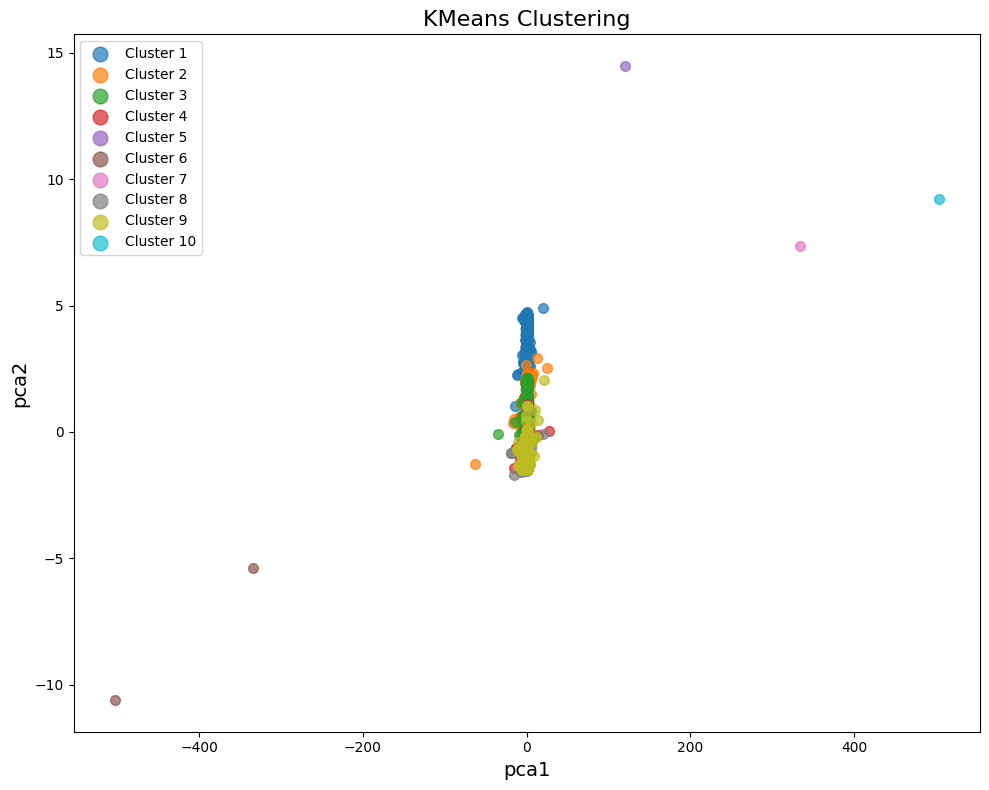

In [17]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

kmeans.fit(X_scaled)
cluster_labels = kmeans.labels_

plt.figure(figsize=(10, 8))  
 
for i in range(k):
    plt.scatter(X_pca[cluster_labels == i, 0], X_pca[cluster_labels == i, 1],
                label=f'Cluster {i+1}', s=50, alpha=0.7)  
plt.title('KMeans Clustering', fontsize=16)  
plt.xlabel('pca1', fontsize=14) 
plt.ylabel('pca2', fontsize=14) 
plt.legend(markerscale=1.5)  
plt.tight_layout()  
plt.show()


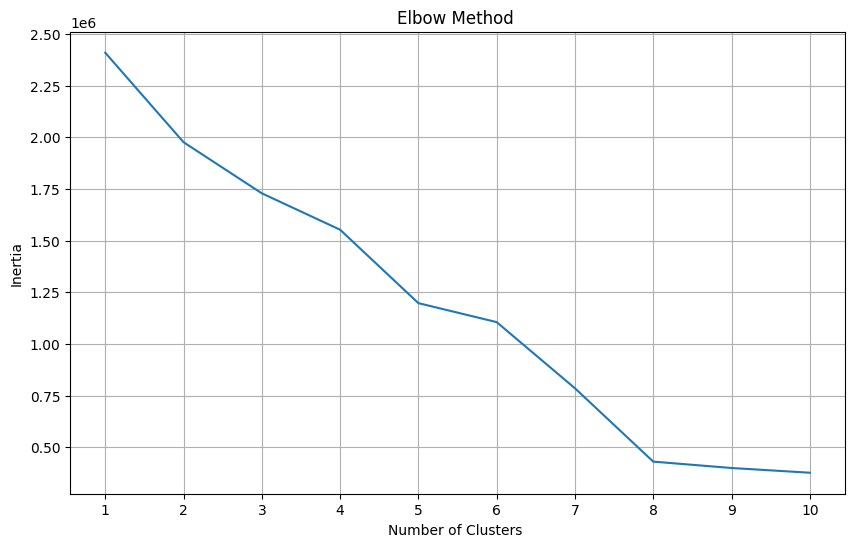

In [12]:
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)


plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), inertia)
plt.xlabel('Number of Clusters ')
plt.ylabel('Inertia')
plt.title('Elbow Method ')
plt.xticks(range(1, 11))
plt.grid(True)
plt.show()

# 3
performing hierarchical clustering kept crashing my kernel, not sure why, it might be because the dataset is too large.

In [13]:
df.head()

,Quantity,UnitPrice,CustomerID,TotalAmount,Description_Encoded,Country_encoded
0,0.500037,0.000065,17850.0,0.500045,3713,35
1,0.500037,0.000087,17850.0,0.500060,3721,35
2,0.500049,0.000071,17850.0,0.500065,860,35
3,0.500037,0.000087,17850.0,0.500060,1812,35
4,0.500037,0.000087,17850.0,0.500060,2774,35


In [15]:
X1 = df[['Country_encoded', 'TotalAmount']]

cluster = AgglomerativeClustering(n_clusters=5, linkage='ward')
df['Cluster'] = cluster.fit_predict(X1)

sns.scatterplot(data=df, x='Country_encoded', y='TotalAmount')
plt.title('Hierarchical Clustering')
plt.xlabel('Country_encoded')
plt.ylabel('TotalAmount')
plt.show()

# 4 
Performing k-mean was a lot easier to implement and faster, i also think hierarchical clustering is harder to use in this dataset beacuse of the size of it due to the bottom up approach it uses vs the top down approach used by k-mean.